In [0]:
# tulis NPM Anda di sini
NPM = '1706979480'

# Jika ada teman Anda yang juga merupakan peserta perkuliahan Pemelajaran Mesin membantu Anda
# mengerjakan tugas sini, tuliskan NPM teman Anda dalam bentuk array of string di sini
KOLABORATOR = ['1706040031', '']

# tulis referensi yang Anda gunakan untuk mengerjakan tugas ini
REFERENSI = ['https://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns',
             'https://pbpython.com/categorical-encoding.html',
             'https://mmuratarat.github.io/2019-07-23/kmeans_from_scratch',
             'https://towardsdatascience.com/k-medoids-clustering-on-iris-data-set-1931bf781e05',
             'https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/unsupervised_learning/partitioning_around_medoids.py',
             
             ]

PR ini terdiri dari 2 bagian:
1. Implementasi dan Analisis (skor = 50):
    * Soal 1 - Implementasi K-Means
    * Soal 2 - Implementasi K-Medoids
    * Soal 3 - Analisis
2. Demo program (skor = 50)

Berikut ketentuan pengerjaan PR 4:
* Anda diberikan berkas PR4\_UnsupervisedLearning.ipynb dan <i>dataset</i> Mall_Customers. <i>Dataset</i> tersebut mengandung atribut-atribut berikut:
  * CustomerID: ID pelanggan
  * Gender: Jenis kelamin pelanggan
  * Age: Umur pelanggan
  * Annual Income(k$): Pendapatan pelanggan per tahun
  * Spending Score: Skor yang diberikan ke pelanggan dari otoritas mal, berdasarkan uang yang dibelanjakan dan perilaku pelanggan    
* Tuliskan jawaban Anda di bagian <b># YOUR CODE HERE</b> pada berkas ini.
* Jangan mengubah <i>class</i> dan <i>method</i> yang sudah ada. Anda dipersilakan untuk menambahkan parameter, variabel, <i>method</i>, atau <i>class</i> baru jika diperlukan.
* <i>Library</i> yang boleh digunakan hanya yang disebutkan pada <i>cell</i> di bawah ini.
* Berikan penjelasan singkat mengenai <i>code</i> yang Anda tuliskan.
* Kumpulkan berkas ini melalui SCeLE dengan format penamaan PR4\_NPM\_KodeAsdos.ipynb sebelum tanggal 1 Juni 2020 pukul 23:55. Toleransi keterlambatan sampai jam 01:00 di hari selanjutnya (penalti 10% dari nilai total). Jika Anda telat sampai melewati jam 01:00, Anda diberikan kesempatan untuk mengumpulkan tugas ini melalui email asisten sesuai dengan kode asdos untuk demo paling lambat tanggal 2 Juni 2020 dengan nilai maksimum 50 poin. Kode Asdos dapat Anda temukan pada berkas Kode Asdos Machine Learning 2020 di <a href='https://scele.cs.ui.ac.id/course/view.php?id=836'>SCeLE</a>.
* <b>Jangan menunda-nunda pekerjaan ini karena konten tugas cukup banyak</b>. Hubungi Hadi di telegram (@putrahadisyah) atau bertanya melalui grup <a href='https://t.me/joinchat/BeCN9BuP_Z3ZA3nalUuxBg'>Mahasiswa ML 2019/2020</a> di telegram jika ada pertanyaan.

Berikut pembagian asisten dosen untuk PR 4:

| Kode Asdos | Nama Asdos | Email |
| --- | --- | --- |
| A | Raditya Nurfadillah | raditya.nurfadillah91@ui.ac.id |
| B | Syifa Nurhayati | syifa.nurhayati@ui.ac.id |
| C | Gries Yulianti | gries.yulianti@ui.ac.id |
| D | Hadi Syah Putra | hadi.syah@ui.ac.id |

Untuk demo, Anda dapat memilih untuk melakukan demo <i>offline</i> atau demo <i>online</i>.
* Demo <i>offline</i>: Anda dapat membuat video yang menjelaskan kode program dan mengisi <i>form</i> <a href='https://forms.gle/mSmgaUNghxrW54LXA'>ini</a> dengan tautan unggahan video tersebut paling lambat tanggal 10 Juni 2020 pukul 23:55. Video berdurasi maksimal 15 menit. Kriteria isi video meliputi penjelasan kode yang Anda kerjakan pada bagian <b># YOUR CODE HERE</b>.
* Demo <i>online</i>: Anda dapat mengisi jadwal demo melalui tautan Booking Slot Demo PR 4 di <a href='https://scele.cs.ui.ac.id/course/view.php?id=836'>SCeLE</a>. 

In [2]:
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
from scipy.stats import zscore
import math
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns
import timeit
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def is_similar(X, Y):
    if isinstance(X, list) and isinstance(Y, list):
        if len(X) == len(Y):
            return all([is_similar(x, Y[i]) for i, x in enumerate(X)])
        else:
            return False
    return abs(X-Y) <= 1e-7

<b>Daftar Isi</b>

* [K-Means](#K-Means)
    * [Inisialisasi (K-Means)](#Inisialisasi-(K-Means))
    * [1 Iterasi K-Means](#1-Iterasi-K-Means)
    * [Implementasi (K-Means)](#Implementasi-(K-Means))
* [K-Medoids](#K-Medoids)
    * [Inisialisasi (K-Medoids)](#Inisialisasi-(K-Medoids))
    * [1 Iterasi K-Medoids](#1-Iterasi-K-Medoids)
    * [Implementasi (K-Medoids)](#Implementasi-(K-Medoids))

# K-Means
K-Means adalah algoritma <i>clustering</i> yang mengelompokkan data menjadi $k$ klaster. Pada setiap klaster terdapat titik pusat (<i>centroid</i>) yang merepresentasikan klaster tersebut.

In [220]:
from google.colab import drive
drive.mount('/content/drive')

#df = pd.read_csv(io.BytesIO(uploaded['fashion-mnist.csv']))
with open('/content/drive/My Drive/Machine Learning/Mall_Customers.csv','r') as f:
  df_input = pd.read_csv(f)

#df.head()


# df_input = pd.read_csv('Mall_Customers.csv')
df = df_input.copy()
print(df.shape[0])
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
200


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [5]:
# encode atribut kategorikal (Gender): 'M'->'1' dan 'F'->'0'

# YOUR CODE HERE
encoded = {"Gender": {"Male":1,"Female":0}}
df.replace(encoded, inplace=True)

df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40

In [6]:
# normalisasi data di setiap kolom, kecuali CustomerID. Hint: gunakan fungsi zscore

# YOUR CODE HERE

normalize_columns = df.drop(['CustomerID'],axis=1).columns
for col in normalize_columns:
    df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)

    
df.head()


CustomerID    Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1  1.128152 -1.424569           -1.738999               -0.434801
1           2  1.128152 -1.281035           -1.738999                1.195704
2           3 -0.886405 -1.352802           -1.700830               -1.715913
3           4 -0.886405 -1.137502           -1.700830                1.040418
4           5 -0.886405 -0.563369           -1.662660               -0.395980

Dari data yang mengandung informasi pelanggan (<i>customer</i>), kita akan mengelompokkan pelanggan-pelanggan tersebut ke dalam 3 klaster.

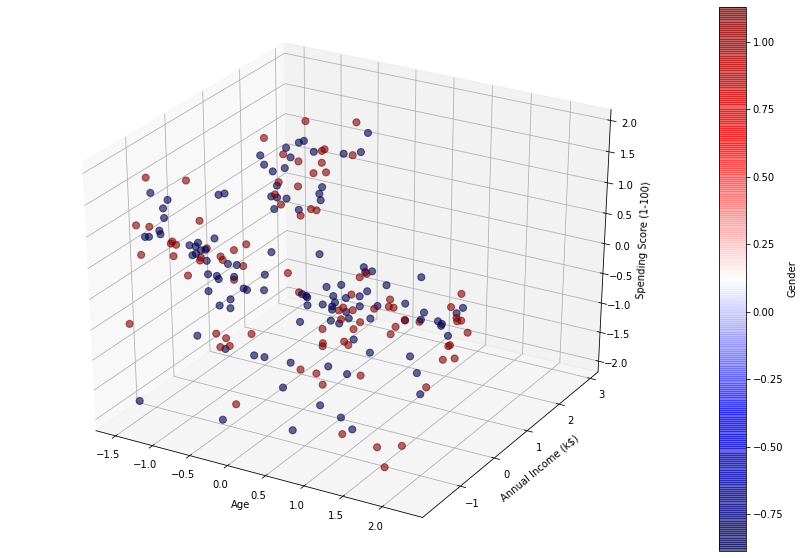

In [7]:
# visualisasi data
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = df['Age']
ys = df['Annual Income (k$)']
zs = df['Spending Score (1-100)']
c = df['Gender']

img = ax.scatter(xs, ys, zs, c=c, s=50, alpha=0.6, cmap='seismic')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
fig.colorbar(img, label='Gender')
plt.show()

In [0]:
points = df[list(set(df.columns)-set(['CustomerID']))].values


## Inisialisasi (K-Means)

Pertama, kita memilih 3 <i>centroid</i> awal secara random yang mewakili titik tengah dari masing-masing klaster.

In [10]:
def initialize_rep(X, k, seed=None):
    if(seed):
        np.random.seed(seed)

    random_idx = np.random.choice(X.shape[0], size=k, replace=False)
    rep = X[random_idx, :]
    return rep


ic = initialize_rep(points, 3, 200)
ic

array([[-0.39597992, -0.06100169, -0.88640526,  0.24581112],
       [ 0.49691598, -0.49160182,  1.12815215,  1.00919971],
       [-1.32769738,  0.58489852, -0.88640526,  2.26879087]])

## 1 Iterasi K-Means
Di dalam satu iterasi K-Means, ada beberapa langkah sebagai berikut:
1. Menghitung jarak setiap titik ke <i>centroid</i> saat ini.
2. Tentukan klaster setiap titik berdasarkan perhitungan jarak pada langkah (1)
3. Optimisasi <i>centroid</i> saat ini dengan menghitung rata-rata dari sekumpulan titik pada masing-masing klaster.

Secara berulang, kita menghitung jarak masing-masing titik ke <i>centroid</i> saat ini untuk mengoptimisasi posisi <i>centroid</i>. Pada kasus ini, kita akan menggunakan <i>Euclidean distance</i> sebagai jarak antar titik. 

<b>Permasalahan</b>: Lengkapi fungsi $euclidean\_distance$ dan $compute\_distance\_matrix$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.  

<i>Hint</i>:<br>
$x_1$ dan $x_2$ adalah sebuah <i>array</i> berukuran sama dan keduanya merepresentasikan sebuah titik dalam koordinat Cartesian.<br>
$rep$ adalah representasi dari sebuah klaster (<i>centroid</i> / <i>medoid</i>)<br>
$S$ adalah <i>distance matrix</i>

In [0]:
def euclidean_distance(x1, x2):
    distance = 0

    # YOUR CODE HERE
    distance = np.linalg.norm(x1-x2)

    return distance

def compute_distance_matrix(X, rep):
    r = len(X)
    c = len(rep)
    S = np.empty((r, c))
    
    for i in range(c):
        S[:,i] = np.linalg.norm(X-rep[i],axis=1)
    return S

In [0]:
# untuk memeriksa apakah fungsi euclidean_distance Anda telah diimplementasikan dengan benar
x1 = np.array([1, 0])
x2 = np.array([1, 2])
distance = euclidean_distance(x1, x2)

assert is_similar(distance, 2.0)
ngetest = compute_distance_matrix(np.array([x1, x2]), [[1,1]])

#untuk memeriksa apakah fungsi compute_distance_matrix Anda telah diimplementasikan dengan benar
assert is_similar(list(compute_distance_matrix(np.array([x1, x2]), [[1,1]])), list([1,1]))

In [13]:
S = compute_distance_matrix(points, ic)
S.shape

(200, 3)

Setelah itu, kita perlu menentukan klaster dari masing-masing titik berdasarkan perhitungan jarak yang telah kita lakukan sebelumnya.

<b>Permasalahan</b>: Lengkapi fungsi $assign\_label$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.

<i>Hint</i>: <br>
$S$ adalah <i>distance matrix</i>

In [0]:
def assign_label(S):
    # YOUR CODE HERE
    S = np.array(S)
    return np.argmin(S,axis=1)

In [0]:
# untuk memeriksa apakah fungsi assign_label Anda telah diimplementasikan dengan benar
idx = assign_label([[1, 2, 3]])
assert is_similar(idx, 0)

In [16]:
labels = assign_label(S)
labels

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1])

Selanjutnya, kita menghitung nilai rata-rata sekumpulan titik pada masing-masing klaster. Nilai rata-rata tersebut akan digunakan sebagai titik tengah (<i>centroid</i>) yang baru di masing-masing klaster.

<b>Permasalahan</b>: Lengkapi fungsi $update\_centroids$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.

<i>Hint</i>: <br>
$X$ = <i>datapoints</i> <br>
$labels$ = <i>array</i> yang berisikan indeks <i>centroid</i> yang telah ditentukan setelah pemanggilan fungsi $assigned\_label$<br>
$old\_centroids$ = <i>centroid</i> yang ingin kita optimisasi

In [0]:
def update_centroids(X, labels, old_centroids):

    # YOUR CODE HERE   
    labels = np.array(labels)
    #new_centroid = np.zeros(old_centroids.shape)
    new_centroids = []
   
    K = old_centroids.shape[0]
   
    for i in range(K):
      
       
        new_centroid = np.mean(X[labels == i], axis = 0)
       
        new_centroids.append(new_centroid)
        
        # new_centroid[i] = np.mean(X[labels == i], axis = 0)
        # print('centroid['+str(i)+']:\n',new_centroid[i])
    new_centroids = np.array(new_centroids)
    

    return np.round(new_centroids, 3)

In [0]:
# untuk memeriksa apakah fungsi update_centroids Anda telah diimplementasikan dengan benar
lbl = [0, 0, 0, 1, 1, 1]
X = np.array([[1, 0], [5, 2], [1, -1], [1, 1], [2, 2], [5, -2]])
c = np.array([[2, 2], [3, 2]])
c = update_centroids(X, lbl, c)

goals = np.array([[2.333, 0.333],
                  [2.667, 0.333]])
np.testing.assert_allclose(c, goals, rtol=1e-5, atol=0)

In [52]:
new_centroid = update_centroids(points, labels, ic)
new_centroid

array([[-0.014,  0.018, -0.707, -0.297],
       [ 0.208, -0.105,  1.05 ,  0.194],
       [-1.31 ,  0.552, -0.154,  1.668]])

1 iterasi algoritma K-means telah kita lakukan. Iterasi ini akan berhenti ketika <i>centroid</i> berhenti bergerak atau dengan kata lain $new\_centroids == old\_centroids$.

## Implementasi (K-Means)
Untuk menyempurnakan algoritma K-means yang telah kita jalankan untuk 1 iterasi, berikut merupakan implementasi dari kelas K-means kita:

<b>Permasalahan</b>: Lengkapi kelas $Kmeans$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.

In [53]:
points

array([[-0.43480148, -1.42456879,  1.12815215, -1.73899919],
       [ 1.19570407, -1.28103541,  1.12815215, -1.73899919],
       [-1.71591298, -1.3528021 , -0.88640526, -1.70082976],
       [ 1.04041783, -1.13750203, -0.88640526, -1.70082976],
       [-0.39597992, -0.56336851, -0.88640526, -1.66266033],
       [ 1.00159627, -1.20926872, -0.88640526, -1.66266033],
       [-1.71591298, -0.27630176, -0.88640526, -1.62449091],
       [ 1.70038436, -1.13750203, -0.88640526, -1.62449091],
       [-1.83237767,  1.80493225,  1.12815215, -1.58632148],
       [ 0.84631002, -0.6351352 , -0.88640526, -1.58632148],
       [-1.4053405 ,  2.02023231,  1.12815215, -1.58632148],
       [ 1.89449216, -0.27630176, -0.88640526, -1.58632148],
       [-1.36651894,  1.37433211, -0.88640526, -1.54815205],
       [ 1.04041783, -1.06573534, -0.88640526, -1.54815205],
       [-1.44416206, -0.13276838,  1.12815215, -1.54815205],
       [ 1.11806095, -1.20926872,  1.12815215, -1.54815205],
       [-0.59008772, -0.

In [0]:
class Kmeans:
    def __init__(self, n_clusters, seed=None):
        self.n_clusters = n_clusters
        self.seed = seed

    def initialize_centroids(self, X):
        if(self.seed):
            np.random.seed(self.seed)

        random_idx = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        centroids = X[random_idx, :]
        self.initial_centroids = centroids 
        return centroids

    def euclidean_distance(self, x1, x2):
        distance = 0

        # YOUR CODE HERE
        distance = np.linalg.norm(x1-x2)
        return distance

    def compute_distance_matrix(self, X, rep):
        r = len(X)
        c = len(rep)
        S = np.empty((r, c))
        
        # YOUR CODE HERE
        for i in range(c):
          
            S[:,i] = np.linalg.norm(X-rep[i],axis=1)
        return S
    
    def assign_label(self, S):
        # YOUR CODE HERE
        S = np.array(S)
        return np.argmin(S,axis=1)

    def update_centroids(self, X, labels, old_centroids):
        
        # YOUR CODE HERE
        labels = np.array(labels)
        new_centroid = np.zeros(old_centroids.shape)
       
        K = old_centroids.shape[0]
       
        for i in range(K):
            new_centroid[i] = np.mean(X[labels == i], axis = 0)
        #print('new centroids :\n',np.round(new_centroid, 3))
        return np.round(new_centroid, 3)

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        old_centroids = np.zeros(self.centroids.shape)
        labels = []
        # algoritma berhenti ketika centroid klaster sekarang sama dengan
        # centroid klaster di iterasi sebelumnya
        while(not np.array_equal(old_centroids, self.centroids)):
            # YOUR CODE HERE
            distance_matrix = self.compute_distance_matrix(X,self.centroids)
            labels = self.assign_label(distance_matrix)
            old_centroids = self.custom_deepcopy(self.centroids)
            self.centroids = self.update_centroids(X,labels,old_centroids)
        self.labels = labels
        return self.centroids
            
    def custom_deepcopy(self,ndarray):
        new_ndarray = np.empty((ndarray.shape))
        n_lines = ndarray.shape[0]
        n_cols = ndarray.shape[1]
        for i in range(n_lines):
            for j in range(n_cols):
                temp = ndarray[i][j]
                new_ndarray[i][j] = temp
        return new_ndarray

    def predict(self, X):
        labels = []        
        # YOUR CODE HERE
        distance_matrix = self.compute_distance_matrix(X,self.centroids)
        print('distance matrix:\n',distance_matrix)
        labels = self.assign_label(distance_matrix)
        
        return labels

In [56]:
kmeans = Kmeans(3, 200)
kmeans.fit(points)
print('centroids:\n',kmeans.centroids)
# untuk memeriksa apakah kelas Kmeans Anda telah diimplementasikan dengan benar
X_test = np.array([[-1.4, -1.7, -0.4, 1.1]])
y_pred = kmeans.predict(X_test)
#assert is_similar(y_pred, [0])
y_pred

centroids:
 [[ 0.231 -0.126 -0.886 -0.245]
 [ 0.302  0.087  1.128 -0.174]
 [-1.321  0.187  0.212  1.089]]
distance matrix:
 [[2.68008545 3.16986325 1.98536521]]


array([2])

<br>
<font size=6><b>Playground</b></font>

<b>P1</b>: membandingkan kelas Kmeans dengan KMeans sklearn

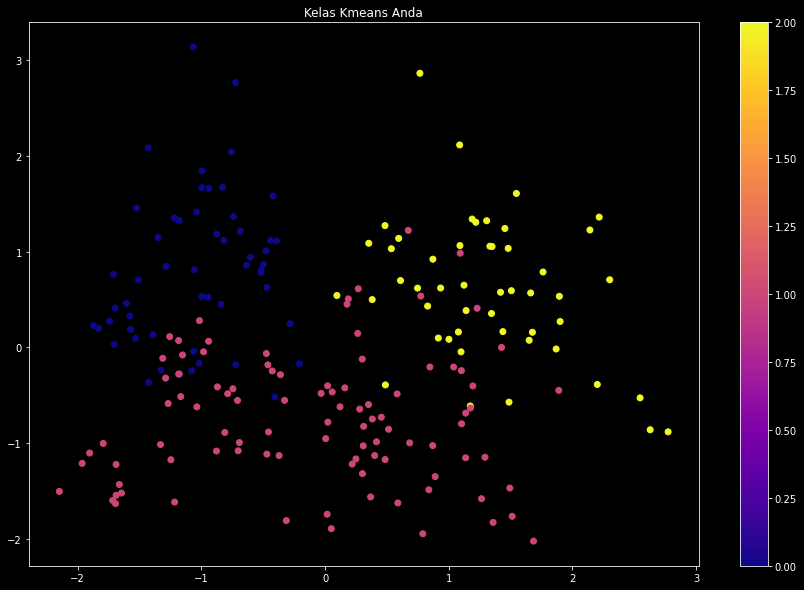

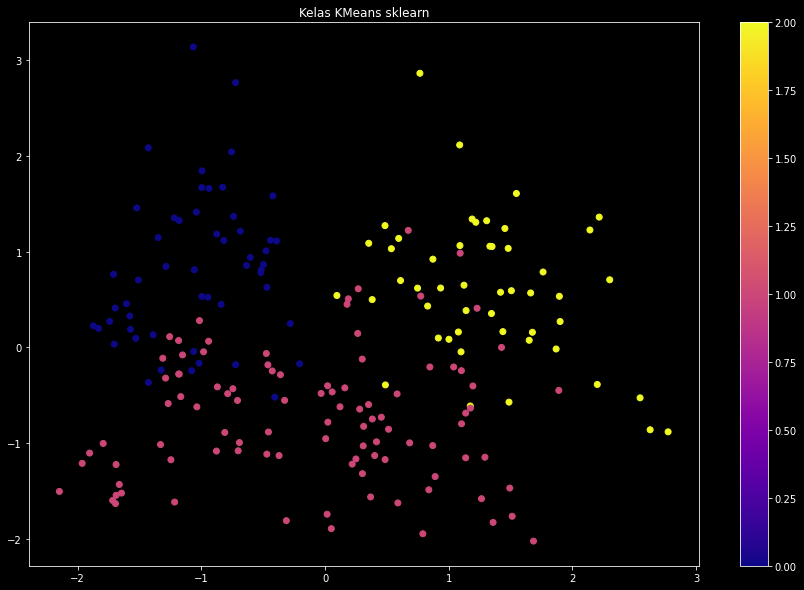

In [221]:
from sklearn.cluster import KMeans


def plot_2d(X, title, labels):
    plt.style.use('dark_background')
    pca_2d = PCA(n_components=2).fit(X).transform(X)
    plt.figure(figsize=(15, 10))
    plt.title(title)
    img = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels, cmap='plasma')
    plt.colorbar(img)
    plt.show()


# kelas Kmeans
# kmeans.labels: simpan label data setelah menjalankan algo Kmeans Anda
plot_2d(points, 'Kelas Kmeans Anda', kmeans.labels)

# KMeans sklearn
kmeans_comparison = KMeans(n_clusters=3,
                           init=kmeans.initial_centroids,  # simpan initial centroid algo Kmeans Anda
                           n_init=1,
                           max_iter=1000000000)
kmeans_comparison.fit(points)
plot_2d(points, 'Kelas KMeans sklearn', kmeans_comparison.labels_)

<b>P2</b>: Mengintepretasikan hasil <i>clustering</i> algoritma K-Means

Jumlah pelanggan di setiap klaster:
Cluster
0    90
1    63
2    47
Name: CustomerID, dtype: int64

Distribusi gender di setiap klaster:



Distribusi Spending Score (1-100) di setiap klaster:


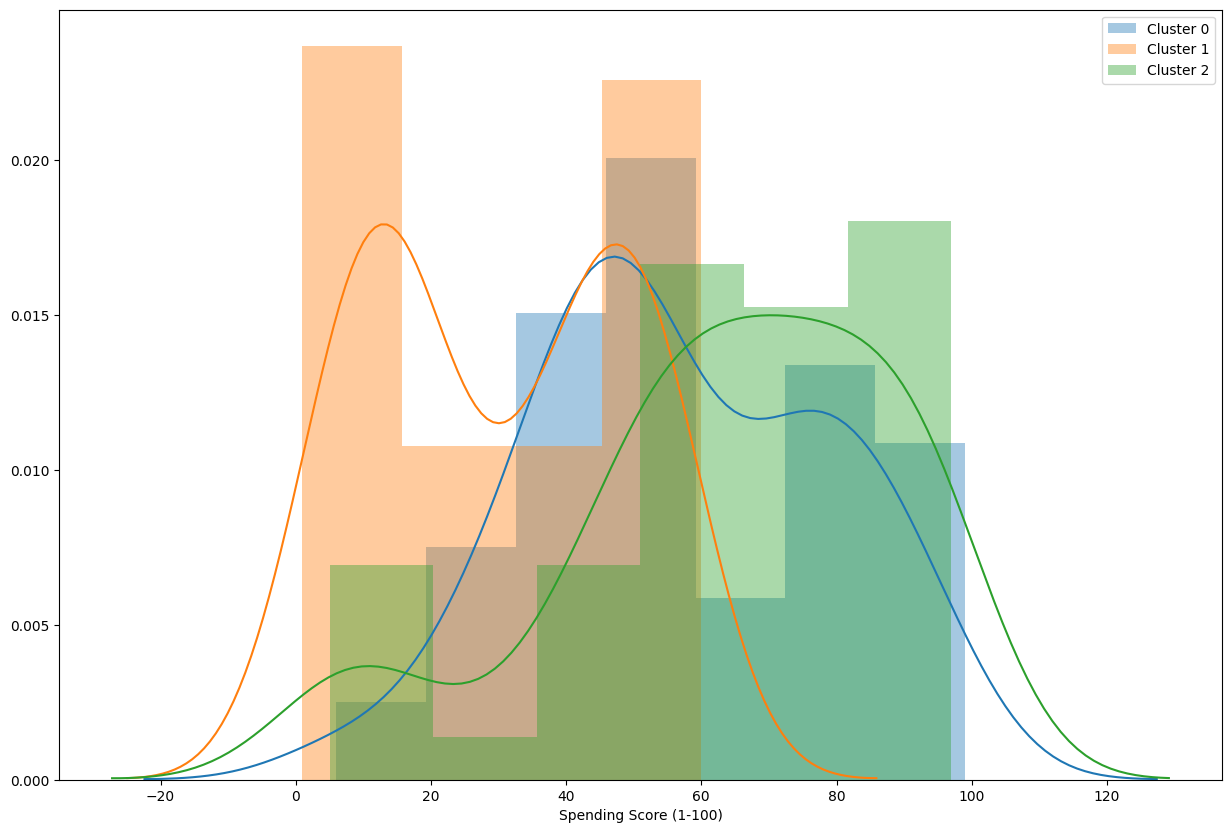


Distribusi Age di setiap klaster:


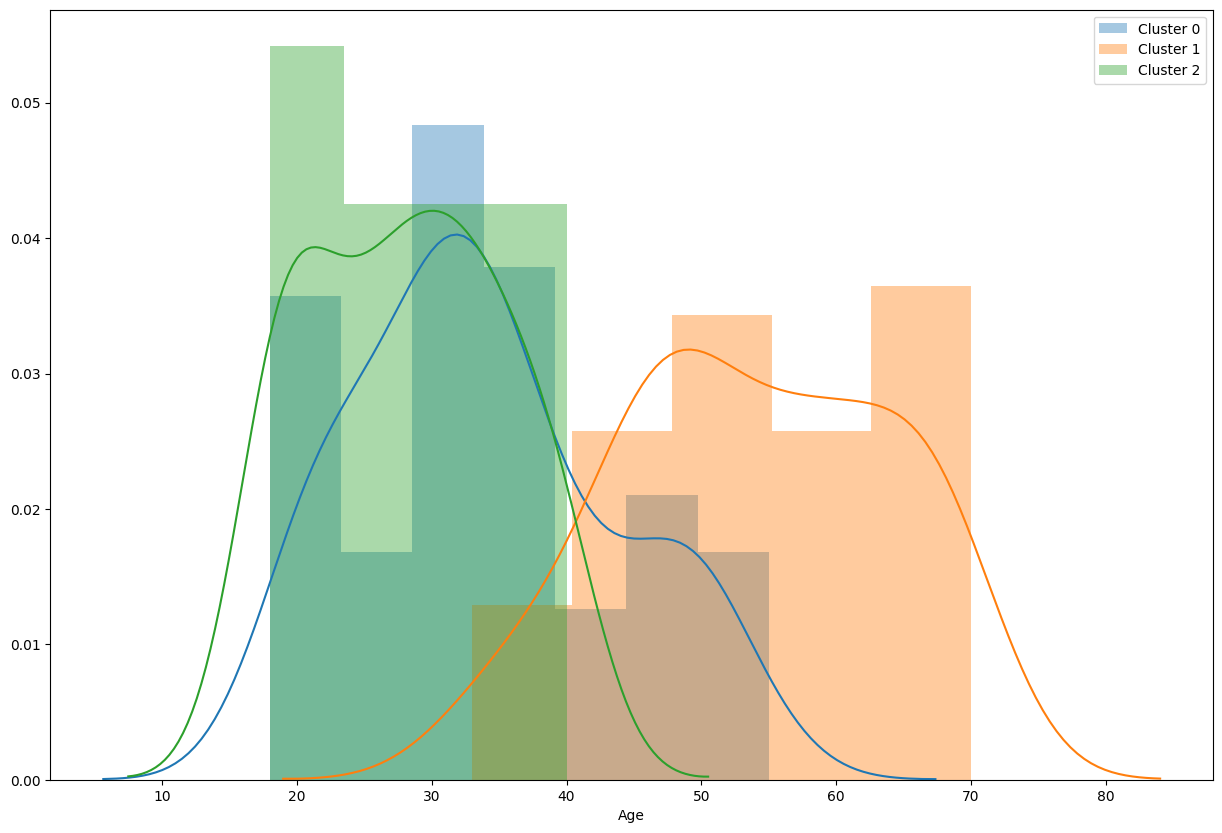


Distribusi Annual Income (k$) di setiap klaster:


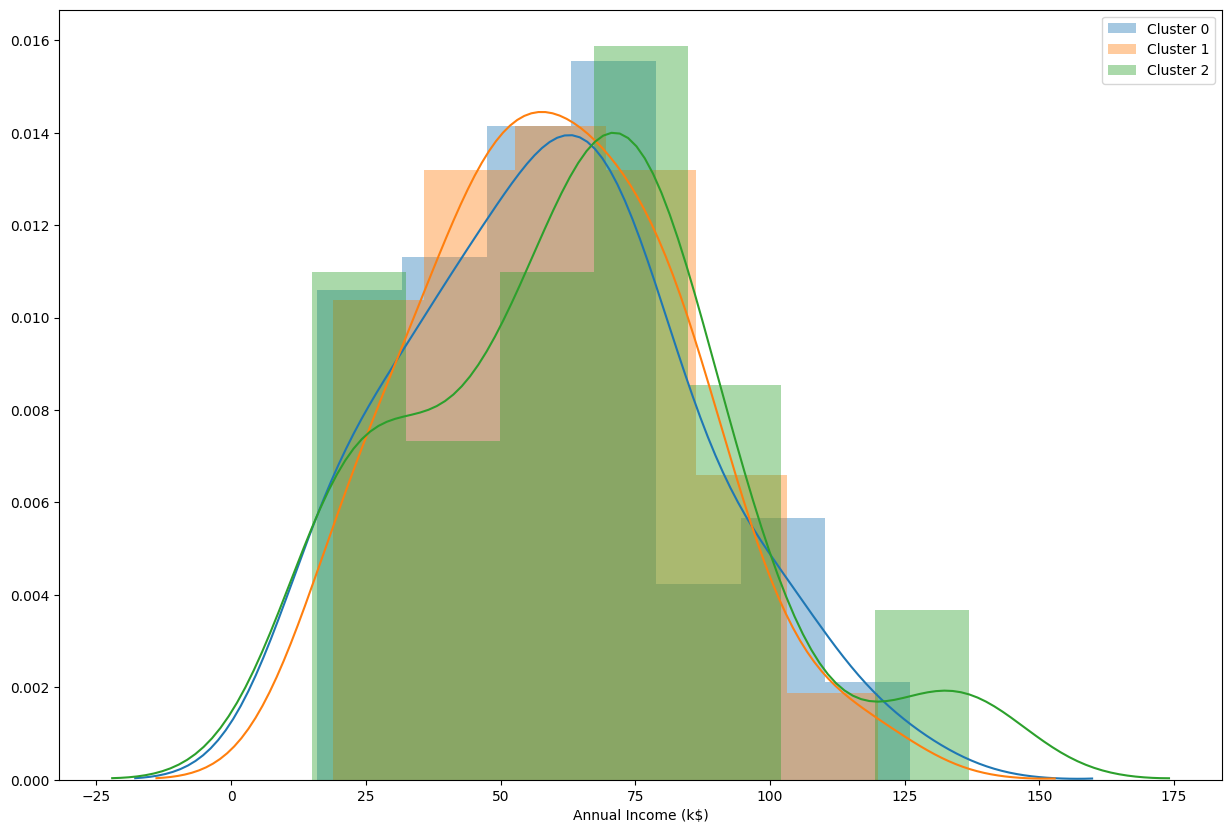

In [240]:
df_copy_kmeans = df_input.copy()
df_copy_kmeans['Cluster'] = kmeans.labels


def visualize_cat(data, column_name):
    plt.style.use('default')
    fig, axes = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)
    for c in set(kmeans.labels):
        df_cluster = data[data['Cluster'] == c]
        count = df_cluster[column_name].value_counts(normalize=True)
        axes[c].bar(count.index, count.values)
        axes[c].text(0.5, -0.2, 'Cluster ' + str((c)),
                     horizontalalignment='center', transform=axes[c].transAxes)
    plt.show()


def visualize_num(data, column_name):
    plt.style.use('default')
    # histogram
    plt.figure(figsize=(15, 10))
    for c in set(kmeans.labels):
        df_cluster = data[data['Cluster'] == c]
        sns.distplot(df_cluster[column_name],
                     norm_hist=True, label='Cluster ' + str(c))
        plt.legend()
    plt.show()

    # boxplot
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='Cluster', y=column_name, data=data)
    plt.show()


# exploratory data analysis
print('Jumlah pelanggan di setiap klaster:')
print(df_copy_kmeans.groupby('Cluster')['CustomerID'].nunique())
print('='*90 + '\n')

print('Distribusi gender di setiap klaster:')
visualize_cat(df_copy_kmeans, 'Gender')
print('='*90 + '\n')

for c in set(df_copy_kmeans.columns) - set(['CustomerID', 'Gender', 'Cluster']):
    print('Distribusi {} di setiap klaster:'.format(c))
    visualize_num(df_copy_kmeans, c)
    print('='*90 + '\n')

<b>P3</b>: Evaluasi hasil <i>clustering</i> algoritma K-Means

<i>Clustering</i> dapat dievaluasi dengen menghitung skor silhouette, yaitu skor antara -1 (<i>bad clustering</i>) dan 1 (<i>good clustering</i>) yang menunjukkan apakah suatu klaster memiliki kohesi dan separasi yang bagus. 

Untuk menghitung skor silhouette, ikuti langkah-langkah berikut:
1. Untuk tiap titik data, hitung rata-rata jarak ke semua titik data di klaster yang sama (tidak termasuk titik yg sedang dihitung skor silhouette-nya). Misal, hasil perhitungan tersebut kita sebut $a$.
2. Untuk tiap titik data dan klaster yang tidak mengandung titik tersebut, hitung rata-rata jarak ke semua titik data yang berada di klaster lain. Dari perhitungan untuk masing-masing klaster lain, ambil rata-rata jarak terpendek. Hasil perhitungan ini kita sebut $b$.
3. Untuk setiap titik data, hitung skor silhouette: $s = (b-a)/max(a,b)$

<b>Permasalahan</b>: Lengkapi fungsi $silhouette\_score$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.

<i>Hint</i>:<br>
Untuk titik data $i \in C_i$ (titik data $i$ pada klaster $C$)
* $a(i)=\frac{1}{(|C_i|-1)}\Sigma_{j \in C_i,i \neq j} d(i,j)$
* $b(i)=\min_{k \neq i}\frac{1}{(|C_k|)}\Sigma_{j \in C_k} d(i,j)$
* $s(i)=\frac{b(i)-a(i)}{max\{a(i),b(i)\}}$

In [0]:
# mengembalikan datapoints dengan label l
# hint: gunakan fungsi ini untuk menemukan titik-titik data yang satu klaster
# atau beda dengan klaster dengan suatu titik data
def get_points(X, labels, l):
    indices = [i for i, x in enumerate(labels) if x == l]
    points = []
    for i in indices:
        points.append(X[i])
    return points


def silhouette_score(X, labels):
    s_arr = []
    for i in range(len(X)):
        a = None
        b = float('inf')
        points= get_points(X,labels,labels[i])
        size_points = len(points)
        points = np.array(points)
        a_i = X[i]
        distances = np.linalg.norm(points-a_i,axis=1)
        a = np.sum(distances)/(size_points-1)
        another_labels = list(set(labels[ labels != labels[i]]))
        for label in another_labels:
          points = get_points(X,labels,label)
          size_points= len(points)
          points = np.array(points)
          b_i = X[i]
          distances =  np.linalg.norm(points-b_i,axis=1)
          b_score = np.sum(distances) /(size_points) 
          if ( b_score < b):
            b = b_score
    
            
            
        
        # YOUR CODE HERE
        
        # menghitung skor silhouette
        s = (b - a) / max(a, b)
        s_arr.append(s)

    print('Skor silhouette: ', np.mean(s_arr))
    return np.mean(s_arr)

  

In [238]:
# untuk memeriksa apakah fungsi silhouette_score
from sklearn.metrics import silhouette_score as ss
silhoute_sklearn = ss(points, kmeans.labels)
silhouette_sendiri = silhouette_score(points, kmeans.labels)
# assert is_similar(ss(points, kmeans.labels),
#                   silhouette_score(points, kmeans.labels))
kmeans_labels = kmeans.labels
print('silhoute_sklearn:\n',silhoute_sklearn)
print('silhoutte_sendiri:\n',silhouette_sendiri)
print('kmeans.lables:\n',kmeans.labels)

Skor silhouette:  0.26867668902476355
silhoute_sklearn:
 0.26867668902476355
silhoutte_sendiri:
 0.26867668902476355
kmeans.lables:
 [0 0 1 1 1 1 1 1 2 1 2 1 1 1 2 0 1 0 2 1 2 0 1 0 1 0 1 0 1 1 2 1 2 0 1 1 1
 1 1 1 1 0 2 1 1 1 1 1 1 1 1 0 1 2 1 2 1 2 1 2 2 0 1 1 2 0 1 1 0 1 2 1 1 1
 2 0 1 2 1 1 2 2 2 1 1 2 1 1 1 1 1 0 2 1 1 0 1 1 2 0 1 1 2 0 2 1 1 2 2 2 2
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 2 0 2 0 2 0 1 1 2 0 1 0 2 1 1 0 1 0 2 0 2 1
 1 0 2 0 1 1 1 0 2 0 2 1 1 0 2 0 2 1 2 0 1 0 2 0 2 0 1 0 2 0 2 0 1 0 2 0 1
 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0]


# K-Medoids
K-Medoids adalah algoritma <i>clustering</i> yang agak sedikit berbeda dengan K-Means. Perbedaannya, yaitu:

Pada K-Means, <i>centroid</i> yang merupakan bentuk representasi dari suatu klaster, bisa jadi tidak berasal dari titik data. Sedangkan, K-Medoids memilih medoid (objek yang merepresentasikan suatu klaster) yang berasal dari titik-titik data.

Dalam uji coba menggunakan algoritma ini, kita menggunakan data yang telah kita gunakan sebelumnya pada algoritma K-Means. Data tersebut juga dikelompokkan menjadi 3 klaster.

## Inisialisasi (K-Medoids)
Sama halnya dengan K-Means, K-Medoids mengharuskan kita untuk memilih 3 <i>medoid</i> awal secara random yang mewakili tiap klaster.

In [57]:
im = initialize_rep(points, 3, 200)
im


array([[-0.39597992, -0.06100169, -0.88640526,  0.24581112],
       [ 0.49691598, -0.49160182,  1.12815215,  1.00919971],
       [-1.32769738,  0.58489852, -0.88640526,  2.26879087]])

## 1 Iterasi K-Medoids
K Medoids memiliki beberapa varian algoritma. Pada implementasi kali ini, kita akan menggunakan algo Partitioning Around Medoids (PAM). Dalam satu iterasi untuk mendapatkan <i>medoid</i> terbaik (<i>medoid</i> dengan <i>cost</i> terkecil) pada algo tersebut, ada beberapa langkah sebagai berikut:
1. Menghitung jarak setiap titik ke <i>medoid</i> saat ini (sama dengan K-Means).
2. Tentukan klaster setiap titik berdasarkan perhitungan jarak pada langkah (1) (sama dengan K-Means) dan hitung <i>cost</i> berdasarkan konfigurasi klaster. <i>Cost</i> merupakan hasil penjumlahan jarak terpendek dari setiap titik ke <i>medoid</i> saat ini.
3. Ambil titik data yang bukan <i>medoid</i> untuk dijadikan kandidat baru <i>medoid</i>. Untuk masing-masing <i>medoid</i>, <i>swap</i> <i>medoid</i> dengan kandidat tersebut. Jika <i>cost</i> dengan konfigurasi <i>medoid</i> hasil <i>swap</i> lebih kecil, <i>update medoid</i>.

Secara berulang, kita ulangi langkah 1-3 untuk mendapatkan konfigurasi <i>medoid</i> dengan <i>cost</i> terkecil. Gunakan referensi <a href='https://sci-hub.tw/https://link.springer.com/chapter/10.1007/11424857_20'>ini</a> untuk memahami bagaimana algoritma PAM diimplementasikan. 

In [58]:
# langkah 1 
S = compute_distance_matrix(points, im)
S

array([[3.1398624 , 3.04813418, 4.99560254],
       [3.46696607, 2.94348558, 5.47449423],
       [2.68335282, 4.12807209, 4.43433005],
       [2.64792413, 3.48070146, 4.93280055],
       [1.97348315, 3.46405704, 4.20034798],
       [2.62944855, 3.4593389 , 4.9092722 ],
       [2.29926229, 3.99220915, 4.00624765],
       [3.00859201, 3.58612479, 5.22432633],
       [3.6000138 , 4.1756925 , 4.54571416],
       [2.286837  , 3.30724202, 4.59093473],
       [3.57288331, 4.08223231, 4.58110732],
       [2.94097371, 3.57697429, 5.09765265],
       [2.49407958, 4.18958097, 3.89791813],
       [2.50819299, 3.35015121, 4.78556319],
       [2.89492343, 3.23057168, 4.37676874],
       [3.29963367, 2.72780403, 5.2752502 ],
       [1.77956276, 3.41066743, 3.94523294],
       [3.13509335, 2.66486576, 5.08527662],
       [2.84092603, 3.12568242, 4.26027316],
       [2.81724207, 3.45231719, 4.95817706],
       [2.61463027, 2.6477138 , 4.33255293],
       [3.04367106, 2.48707479, 4.98745572],
       [2.

In [59]:
# langkah 2
labels = assign_label(S)
labels

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1])

<b>Permasalahan</b>: Lengkapi fungsi $calculate\_cost$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya. Ingat! <i>Cost</i> merupakan hasil penjumlahan jarak terpendek dari setiap titik ke <i>medoid</i> saat ini (<i>sum of square</i>).

<i>Hint</i>:<br>
S adalah <i>distance matrix</i>

In [0]:
def calculate_cost(S):
    # YOUR CODE HERE
    sum = 0
    for i, s in enumerate(S):
      sum+= s[s.argmin()]
    return sum

In [0]:
# untuk memeriksa apakah fungsi calculate_cost Anda telah diimplementasikan dengan benar
x1 = np.array([1, 0])
x2 = np.array([1, 2])

s = compute_distance_matrix(np.array([x1, x2]), [[1,1]])

assert is_similar(calculate_cost(s), 2)

In [166]:
cost = calculate_cost(S)
cost

350.8989715267463

<b>Permasalahan</b>: Lengkapi fungsi $update\_medoids$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.  

<i>Hint</i>:<br>
$X$ = <i>datapoints</i> <br>
$labels$ = <i>array</i> yang berisikan indeks <i>medoid</i> yang telah ditentukan setelah pemanggilan fungsi $assigned\_label$<br>
$medoids$ = <i>medoid</i> yang ingin kita optimisasi<br>
$cost$ = <i>cost</i> dari $medoids$

Gunakan referensi <a href='https://sci-hub.tw/https://link.springer.com/chapter/10.1007/11424857_20'>ini</a> bagian 2.1 untuk membantu Anda.

In [168]:
im

array([[-0.39597992, -0.06100169, -0.88640526,  0.24581112],
       [ 0.49691598, -0.49160182,  1.12815215,  1.00919971],
       [-1.32769738,  0.58489852, -0.88640526,  2.26879087]])

In [167]:
cost

350.8989715267463

In [100]:
S



array([[3.1398624 , 3.04813418, 4.99560254],
       [3.46696607, 2.94348558, 5.47449423],
       [2.68335282, 4.12807209, 4.43433005],
       [2.64792413, 3.48070146, 4.93280055],
       [1.97348315, 3.46405704, 4.20034798],
       [2.62944855, 3.4593389 , 4.9092722 ],
       [2.29926229, 3.99220915, 4.00624765],
       [3.00859201, 3.58612479, 5.22432633],
       [3.6000138 , 4.1756925 , 4.54571416],
       [2.286837  , 3.30724202, 4.59093473],
       [3.57288331, 4.08223231, 4.58110732],
       [2.94097371, 3.57697429, 5.09765265],
       [2.49407958, 4.18958097, 3.89791813],
       [2.50819299, 3.35015121, 4.78556319],
       [2.89492343, 3.23057168, 4.37676874],
       [3.29963367, 2.72780403, 5.2752502 ],
       [1.77956276, 3.41066743, 3.94523294],
       [3.13509335, 2.66486576, 5.08527662],
       [2.84092603, 3.12568242, 4.26027316],
       [2.81724207, 3.45231719, 4.95817706],
       [2.61463027, 2.6477138 , 4.33255293],
       [3.04367106, 2.48707479, 4.98745572],
       [2.

In [0]:
def get_non_medoids(X,medoids):
  non_medoids = []
  medoids = medoids.tolist()
  for sample in X:
    sample = sample.tolist()
    if sample not in medoids:
      non_medoids.append(sample)
  return np.array(non_medoids)

In [0]:
def update_medoids(X, medoids, cost):
    while True:
        best_medoids = medoids
        lowest_cost = cost

        # iterasi sampai mendapatkan medoid dengan cost terendah
        # YOUR CODE HERE
        for ind, medoid in enumerate(medoids):
       
          non_medoid_points = get_non_medoids(X,medoids)
      
          for non_medoid_index, non_medoid_point in enumerate(non_medoid_points):
            

            new_medoids = medoids.copy()
            new_medoids[ind] = non_medoid_point
          
            enhanced_distance_matrix = compute_distance_matrix(X, new_medoids)
            enhanced_cost = calculate_cost(enhanced_distance_matrix)
           
            if enhanced_cost < lowest_cost:
              lowest_cost = enhanced_cost
              best_medoids = new_medoids

        if lowest_cost < cost:
            cost = lowest_cost
            medoids = best_medoids
        else:
            break

    print('Best medoids: ', best_medoids)
    print('Lowest cost: ', lowest_cost)

    return best_medoids, lowest_cost

In [183]:
best_medoids, lowest_cost = update_medoids(points, im, cost)
# untuk memeriksa apakah fungsi update_medoids Anda telah diimplementasikan dengan benar

assert is_similar(lowest_cost, 292.8331062151385)

Best medoids:  [[-0.3183368   0.7284319  -0.88640526 -0.25039146]
 [ 0.80748846 -0.56336851 -0.88640526  0.43665827]
 [-0.08540743  0.08253169  1.12815215 -0.25039146]]
Lowest cost:  292.83310621513846


## Implementasi (K-Medoids)
Untuk menyempurnakan algoritma K-Medoids yang telah kita jalankan sampai mendapatkan <i>medoid</i> terbaik, berikut merupakan implementasi dari kelas KMedoids kita:

<b>Permasalahan</b>: Lengkapi kelas $KMedoids$ di bawah ini hanya dengan menggunakan <i>library</i> yang sudah kita impor sebelumnya.

In [0]:
class Kmedoids:
    def __init__(self, n_clusters, seed=None):
        self.n_clusters = n_clusters
        self.seed = seed

    def initialize_medoids(self, X):
        if(self.seed):
            np.random.seed(self.seed)

        random_idx = np.random.choice(
            X.shape[0], size=self.n_clusters, replace=False)
        medoids = X[random_idx, :]
        return medoids

    def euclidean_distance(self, x1, x2):
        distance = 0

        # YOUR CODE HERE
        distance = np.linalg.norm(x1-x2)

        return distance

    def compute_distance_matrix(self, X, rep):
        r = len(X)
        c = len(rep)
        S = np.empty((r, c))
        
        for i in range(c):
          S[:,i] = np.linalg.norm(X-rep[i],axis=1)
        return S

    def assign_label(self, S):
        # YOUR CODE HERE
        S = np.array(S)
        return np.argmin(S,axis=1)

    def calculate_cost(self, S):
        # YOUR CODE HERE
        sum = 0
        for i, s in enumerate(S):
          sum+= s[s.argmin()]
        return sum

    def update_medoids(self,X, medoids, cost):
        while True:
            best_medoids = medoids
            lowest_cost = cost

            # iterasi sampai mendapatkan medoid dengan cost terendah
            # YOUR CODE HERE
            for ind, medoid in enumerate(medoids):
          
              non_medoid_points = get_non_medoids(X,medoids)
          
              for non_medoid_index, non_medoid_point in enumerate(non_medoid_points):
                

                new_medoids = medoids.copy()
                new_medoids[ind] = non_medoid_point
              
                enhanced_distance_matrix = compute_distance_matrix(X, new_medoids)
                enhanced_cost = calculate_cost(enhanced_distance_matrix)
              
                if enhanced_cost < lowest_cost:
                  lowest_cost = enhanced_cost
                  best_medoids = new_medoids

            if lowest_cost < cost:
                cost = lowest_cost
                medoids = best_medoids
            else:
                break

        print('Best medoids: ', best_medoids)
        print('Lowest cost: ', lowest_cost)

        return best_medoids, lowest_cost

    def fit(self, X):
        self.initial_medoids = self.initialize_medoids(X)
        
        # YOUR CODE HERE
        self.distance_matrix = self.compute_distance_matrix(X,self.initial_medoids)
        self.initial_cost = self.calculate_cost(self.distance_matrix)
        self.best_medoids, self.lowest_costs = self.update_medoids(X,self.initial_medoids,self.initial_cost)
        
        self.labels = assign_label(self.compute_distance_matrix(X, self.best_medoids))

    def predict(self, X):
        labels = []
        
        # YOUR CODE HERE
        self.distance_matrix = self.compute_distance_matrix(X,self.best_medoids)
        labels = self.assign_label(self.distance_matrix)

        return labels

In [212]:
kmedoids = Kmedoids(3, 200)
kmedoids.fit(points)

# untuk memeriksa apakah kelas Kmeans Anda telah diimplementasikan dengan benar
X_test = np.array([[-1.4, -1.7, -0.4, 1.1]])
y_pred = kmedoids.predict(X_test)
assert is_similar(y_pred, [0])
y_pred

Best medoids:  [[-0.3183368   0.7284319  -0.88640526 -0.25039146]
 [ 0.80748846 -0.56336851 -0.88640526  0.43665827]
 [-0.08540743  0.08253169  1.12815215 -0.25039146]]
Lowest cost:  292.83310621513846


array([1])

<br>
<font size=6><b>Playground</b></font>

<b>P4</b>: Perbedaan K-Means dan K-Medoids dalam hal sensitivitas terhadap initial <i>centroid</i>/<i>medoid</i>, <i>running time</i>, skor silhoutte, dan sensitivitas terhadap <i>outlier</i>.

In [0]:
def get_outlier(X, threshold):
    z = np.abs(X)
    outlier = X[(z > threshold).all(axis=1)]
    return outlier

In [216]:
# asumsikan data dengan nilai absolute z score lebih dari 1 merupakan outlier
outlier = get_outlier(points, 1)
print(len(outlier))
outlier

9


array([[ 1.19570407, -1.28103541,  1.12815215, -1.73899919],
       [-1.83237767,  1.80493225,  1.12815215, -1.58632148],
       [-1.4053405 ,  2.02023231,  1.12815215, -1.58632148],
       [ 1.11806095, -1.20926872,  1.12815215, -1.54815205],
       [-1.7935561 ,  1.51786549,  1.12815215, -1.16645776],
       [-1.7935561 ,  1.01549866,  1.12815215, -1.05194947],
       [ 1.62274124, -1.49633548,  1.12815215, -1.05194947],
       [-1.36651894,  1.37433211,  1.12815215,  1.04736914],
       [-1.4053405 ,  1.4460988 ,  1.12815215,  1.23821628]])

==============================START OF SEED 111==============================
Initial Centroid:  [[ 0.96277471 -0.06100169  1.12815215  0.39848884]
 [-0.3183368   0.7284319  -0.88640526 -0.25039146]
 [-0.59008772  0.29783176  1.12815215  0.39848884]]
distance matrix:
 [[2.24158113 3.13099076 3.36250617]
 [4.28015075 3.46473171 2.22024532]
 [4.15000281 3.39957924 2.17453917]
 [2.03959526 2.97985102 3.17275345]
 [3.91015842 3.15574562 1.76452692]
 [3.60120258 2.91464471 1.52273148]
 [1.80982871 3.18052374 3.47859236]
 [3.26418809 3.00637859 1.30129668]
 [3.38310596 3.13963197 1.49895598]]


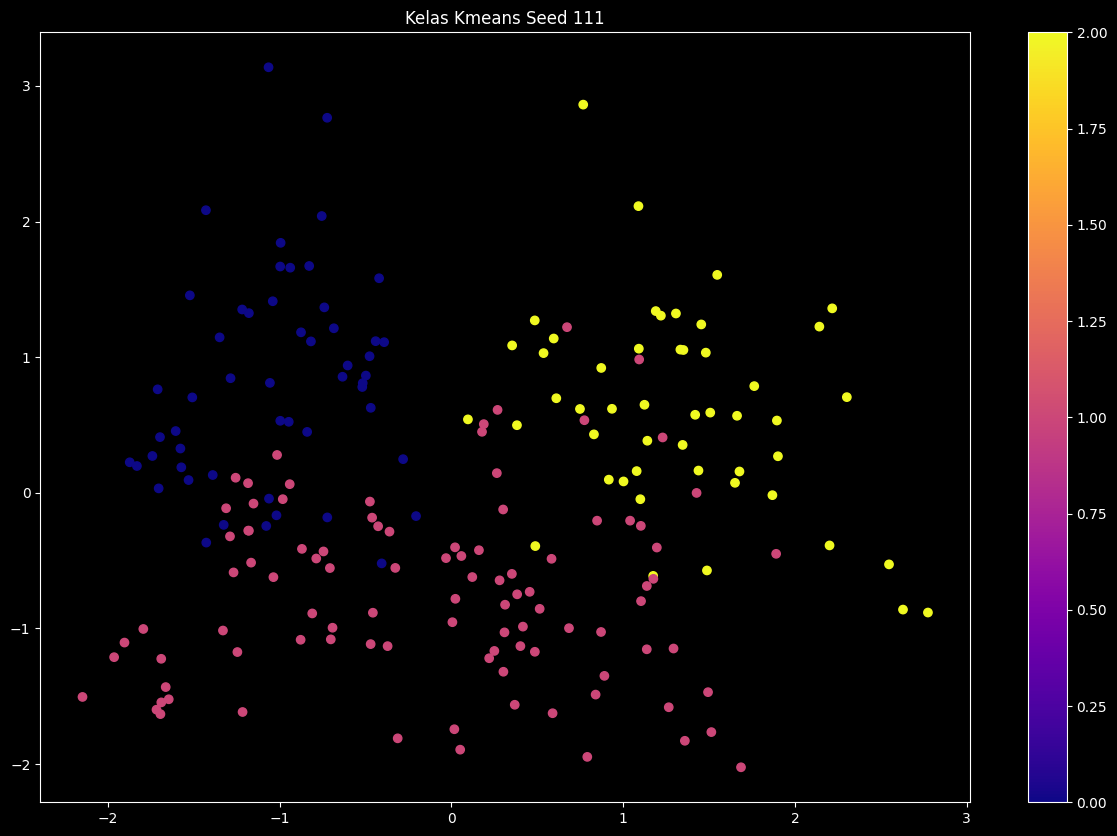

Skor silhouette:  0.26867668902476355
******************************************************************************************
Best medoids:  [[ 0.80748846 -0.56336851 -0.88640526  0.43665827]
 [-0.3183368   0.7284319  -0.88640526 -0.25039146]
 [-0.08540743  0.08253169  1.12815215 -0.25039146]]
Lowest cost:  292.83310621513846
Initial Medoid:  [[ 0.96277471 -0.06100169  1.12815215  0.39848884]
 [-0.3183368   0.7284319  -0.88640526 -0.25039146]
 [-0.59008772  0.29783176  1.12815215  0.39848884]]


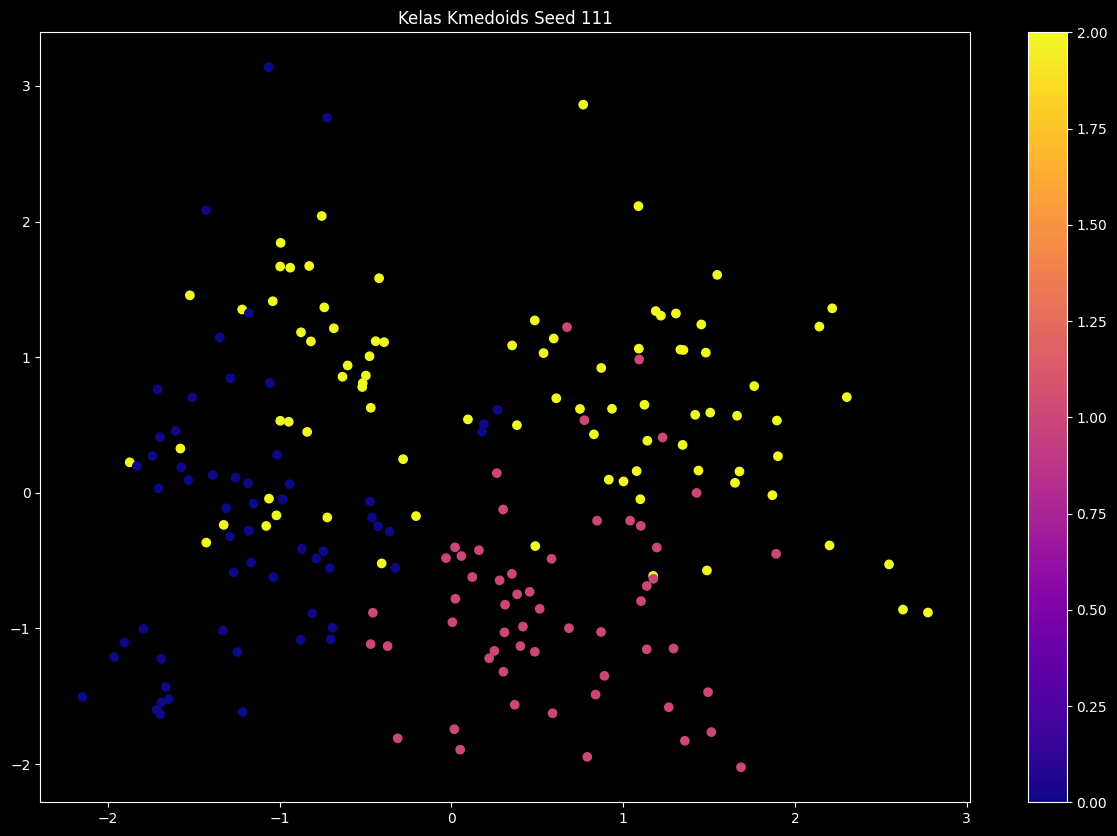

Skor silhouette:  0.22979894425460456
==============================START OF SEED 222==============================
Initial Centroid:  [[-1.7935561   1.01549866  1.12815215 -1.05194947]
 [-1.28887582  0.29783176  1.12815215  0.66567484]
 [-0.35715836 -1.13750203 -0.88640526  0.05496398]]
distance matrix:
 [[3.47395358 2.9865961  2.4109981 ]
 [2.25795216 3.65581486 4.12728753]
 [2.1275263  3.61031294 4.03764494]
 [3.3138801  2.7702123  2.265287  ]
 [1.9593037  3.20389138 3.81422036]
 [1.87345408 2.86432632 3.51249612]
 [3.6613328  2.76736618 2.29564464]
 [2.0600226  2.18319911 3.61401683]
 [2.2206377  2.29336415 3.75057114]]


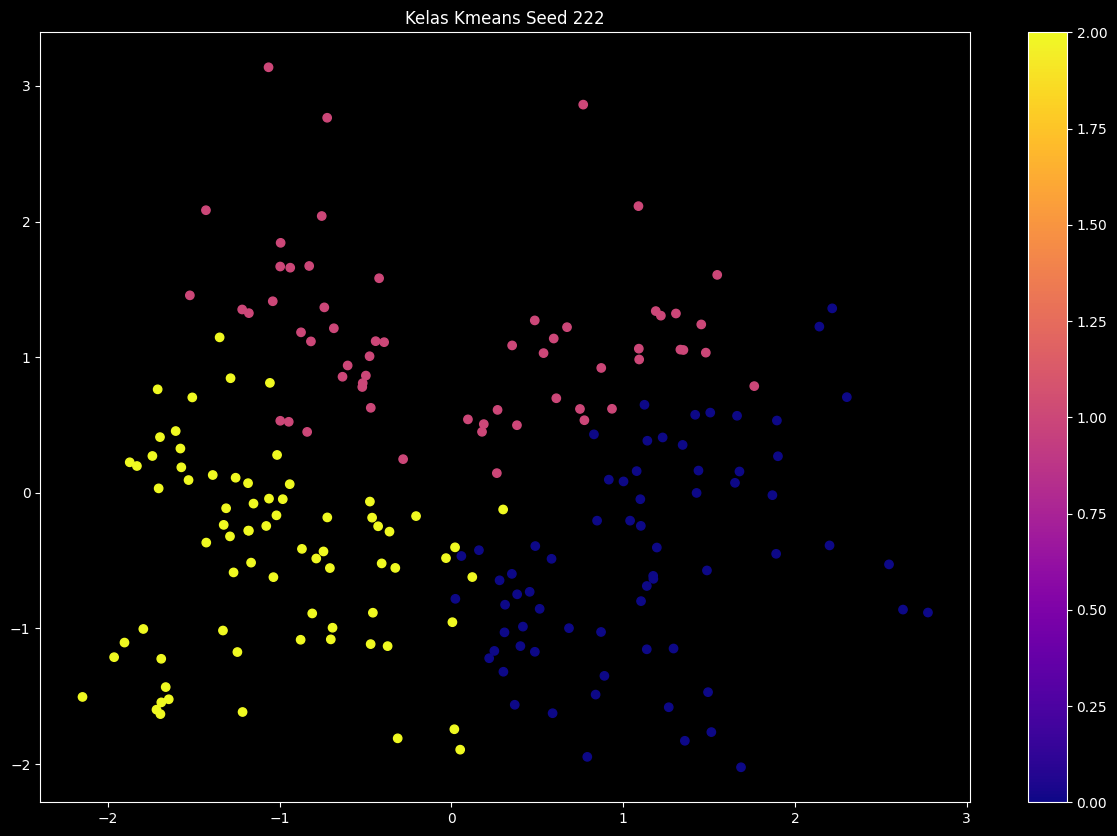

Skor silhouette:  0.23060742355947128
******************************************************************************************
Best medoids:  [[-0.3183368   0.7284319  -0.88640526 -0.25039146]
 [-0.08540743  0.08253169  1.12815215 -0.25039146]
 [ 0.80748846 -0.56336851 -0.88640526  0.43665827]]
Lowest cost:  292.83310621513846
Initial Medoid:  [[-1.7935561   1.01549866  1.12815215 -1.05194947]
 [-1.28887582  0.29783176  1.12815215  0.66567484]
 [-0.35715836 -1.13750203 -0.88640526  0.05496398]]


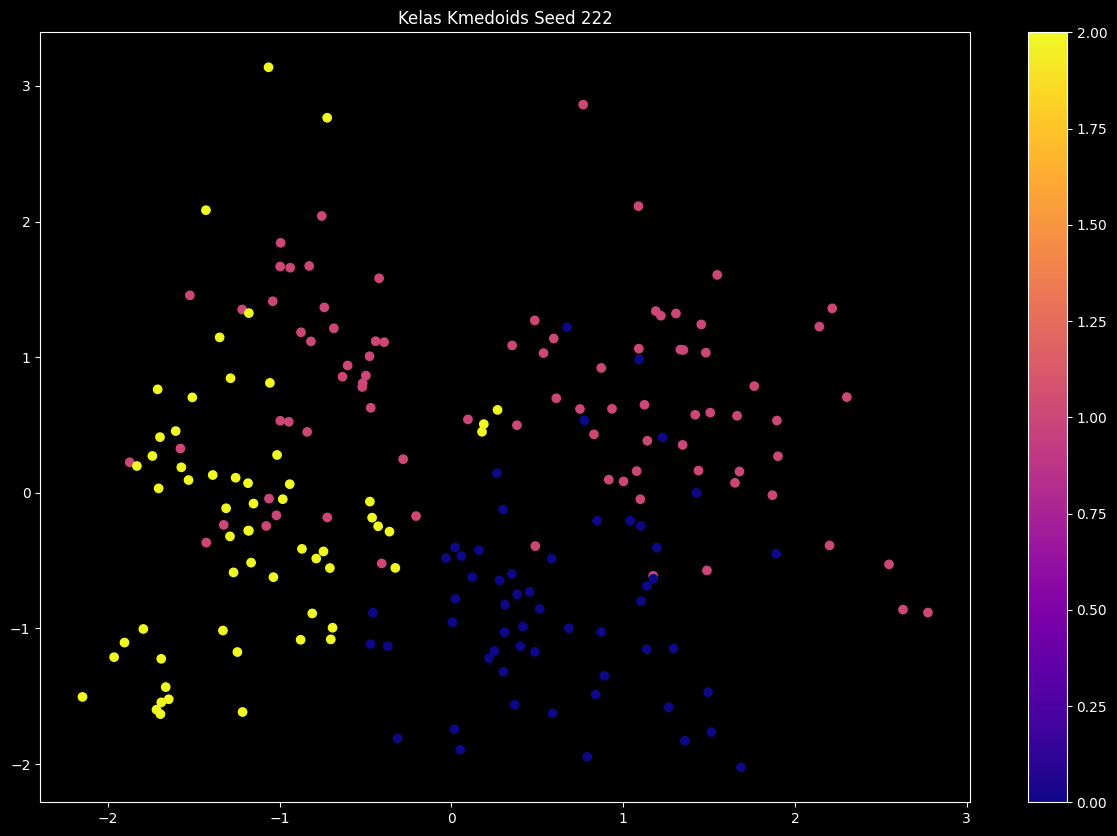

Skor silhouette:  0.22979894425460456
==============================START OF SEED 333==============================
Initial Centroid:  [[ 1.04041783 -0.56336851 -0.88640526  0.36031941]
 [-1.7935561   1.01549866  1.12815215 -1.05194947]
 [-0.04658587 -1.3528021   1.12815215  0.01679455]]
distance matrix:
 [[2.93828558 3.59764202 2.04379238]
 [3.94139759 2.12890368 3.89235923]
 [3.85932557 2.04414996 3.80426618]
 [2.78540641 3.41914968 1.82668032]
 [3.61896252 1.72905394 3.5085887 ]
 [3.35019566 1.59959251 3.15882959]
 [2.86225535 3.74243672 1.76201424]
 [3.30635315 1.43983624 3.00911815]
 [3.43039273 1.61670052 3.14727233]]


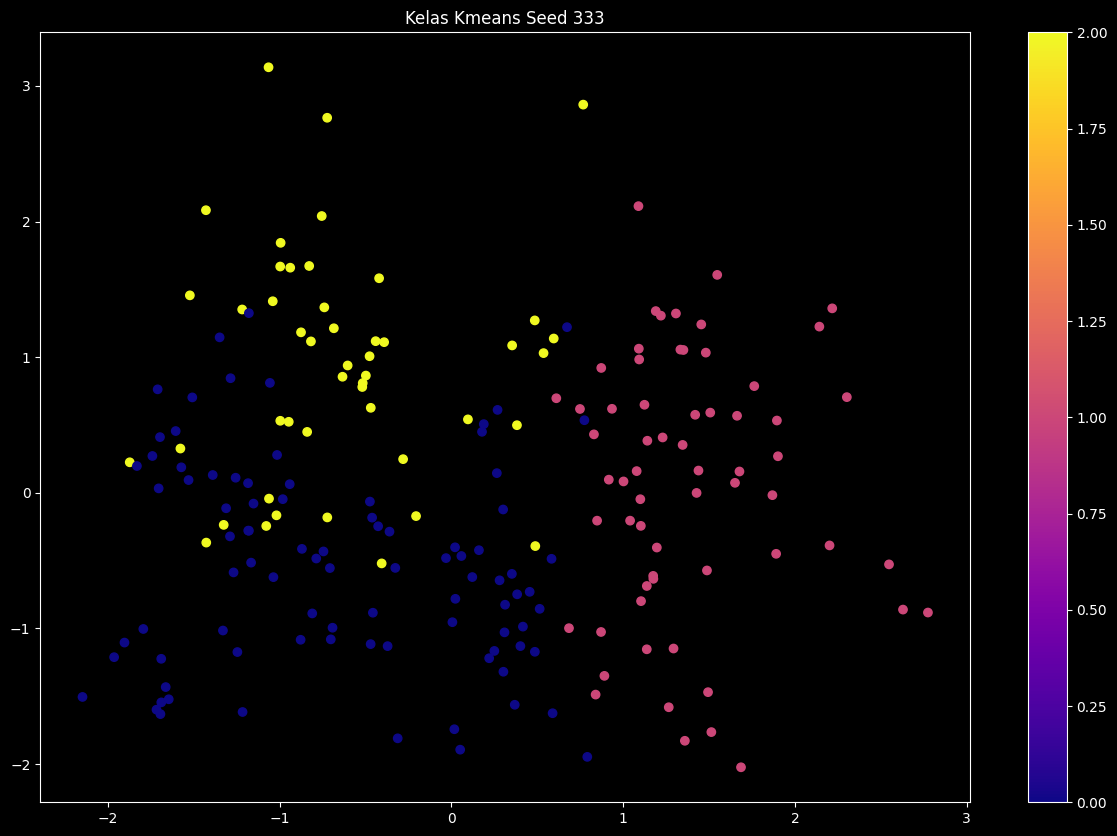

Skor silhouette:  0.26090379605689323
******************************************************************************************
Best medoids:  [[ 0.80748846 -0.56336851 -0.88640526  0.43665827]
 [-0.3183368   0.7284319  -0.88640526 -0.25039146]
 [-0.08540743  0.08253169  1.12815215 -0.25039146]]
Lowest cost:  292.83310621513846
Initial Medoid:  [[ 1.04041783 -0.56336851 -0.88640526  0.36031941]
 [-1.7935561   1.01549866  1.12815215 -1.05194947]
 [-0.04658587 -1.3528021   1.12815215  0.01679455]]


Skor silhouette:  0.22979894425460456


In [239]:
seeds = [111, 222, 333]
k_means_outlier_labels = []
k_means_running_time = []
k_means_silhouette_score = []

k_medoids_outlier_labels = []
k_medoids_running_time = []
k_medoids_silhouette_score = []

for s in seeds:
    print('='*30 + 'START OF SEED ' + str(s) + '='*30)
    kmeans = Kmeans(3, s)
    start = timeit.default_timer()
    kmeans.fit(points)
    stop = timeit.default_timer()
    print('Initial Centroid: ', kmeans.initial_centroids)
    k_means_outlier_labels.append(kmeans.predict(outlier))
    plot_2d(points, 'Kelas Kmeans Seed ' + str(s), kmeans.labels)
    k_means_running_time.append(stop-start)
    k_means_silhouette_score.append(silhouette_score(points, kmeans.labels))
    print('*'*90)

    kmedoids = Kmedoids(3, s)
    start = timeit.default_timer()
    kmedoids.fit(points)
    stop = timeit.default_timer()
    print('Initial Medoid: ', kmedoids.initial_medoids)
    k_medoids_outlier_labels.append(kmedoids.predict(outlier))
    plot_2d(points, 'Kelas Kmedoids Seed ' + str(s), kmedoids.labels)
    k_medoids_running_time.append(stop-start)
    k_medoids_silhouette_score.append(silhouette_score(points, kmedoids.labels))
    '='*30 + 'END OF SEED ' + str(s) + '='*30

In [224]:
print('Average running time Kmeans (seconds) : ' + str(np.mean(k_means_running_time)))
print('Average running time Kmedoids (seconds): ' + str(np.mean(k_medoids_running_time)))
print('='*90)
print('Average silhouette score Kmeans: ' + str(np.mean(k_means_silhouette_score)))
print('Average silhouette score Kmedoids: ' + str(np.mean(k_medoids_silhouette_score)))

Average running time Kmeans (seconds) : 0.007031678000203101
Average running time Kmedoids (seconds): nan
Average silhouette score Kmeans: nan
Average silhouette score Kmedoids: nan


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [225]:
display(k_means_outlier_labels)
display(k_medoids_outlier_labels)

[array([0, 2, 2, 0, 2, 2, 0, 2, 2])]

[]

# Analisis
1. Apakah normalisasi diperlukan saat melakukan <i>clustering</i> menggunakan algoritma K-Means dan K-Medoids? Jelaskan.


Normalisasi digunakan untuk merapikan data. Contohnya seperti meng-handle outlier dan membuang data NaN. Data yang sudah di normalisasi akan lebih berkualitas dibandingkan data yang belum di normalisasi. Data yang berkualitas akan membantu dalam proses pembentukan centroid yang akurat


2. Interpretasikan hasil <i>clustering</i> menggunakan algoritma K-Means yang telah Anda implementasikan (lihat <b>P2</b>). Klaster berapakah yang menurut Anda pantas untuk diberikan promo berbelanja dengan tujuan meningkatkan <i>spending</i> pelanggan? Berikan penjelasan.


Mari kita amati hasil clustering K means dalam beberapa area:

1. Distribusi Gender
Cukup mengejutkan bahwa cluster 0 dan cluster 2 hanya didominasi oleh 1 gener ( Female pada cluster 0, Male pada cluster 2). Pada Cluster 1, di dominasi oleh Female, walaupun terdapat populasi Male juga

2. Spending Score
Cluster 2 memiliki persebaran nilai spending score tertinggi, sedangkan cluser 1 memiliki pesebaran spending score ter rendah

3. Age
Cluster 0 dan 2 didominasi oleh pembeli yang berumur muda ( asumsi muda < 40 tahun) dan cluser 1 didominasi pembeli berusia tua

4. Annual Income
distribusi Annual income pada ketiga cluster cukup merata, dan tidak ada perbedaan signifikan

Pada Boxplot Spending Score dan Annual Income terdapat 1 data point yang merupakan outlier

Menurut saya, akan tepat bila kita memberikan diskon dan promo pada cluster 1, karena range persebaran spending score masih dibawah rata rata serta sebagian besar pelanggan cluster 1 adalah orang tua, dimana gairah untuk "shopping" orang yang lebih tua tidak sebesar orang muda.








3. Jelaskan perbedaan K-Means dan K-Medoids dalam hal sensitivitas terhadap initial <i>centroid</i>/<i>medoid</i>, <i>running time</i>, skor silhoutte, dan sensitivitas terhadap <i>outlier</i> (lihat <b>P4</b>).

Dari 3 contoh random seeding terhadap K-Means dan K-Medoids, sillhouette score K-Means selalu unggul dibandingkan oleh K-Medoids. Dari segi running time, tentu K-Medoids lebih lama dibanding kan K-Means dikarenakan extra iterasi yang dilakukan ketika memperbaharui centroid. Namun, dalam hal sensitivitas terhadap outlier, K-Medoids lebih baik karena bisa kita lihat tidak ada label yang merupakan outlier

